In [3]:
//A* algo
from collections import deque

class Graph:
    def __init__(self, list):
        self.list = list

    def get_neighbors(self, v):
        return self.list[v]
    
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1
        }

        return H[n]
    
    def algo(self, start, stop):
        open_list = set([start])
        closed_list = set([])

        dist = {}
        dist[start] = 0

        adj_dist = {}
        adj_dist[start] = start

        while len(open_list) > 0:
            n = None
            
            for i in open_list:
                if n == None or dist[i] + self.h(i) < dist[n] + self.h(n):
                    n = i
            
            if n == None:
                print('Path doesn\'t exist')
                return None
            
            if n == stop:
                reconst_path = []

                while adj_dist[n] != n:
                    reconst_path.append(n)
                    n = adj_dist[n]
                
                reconst_path.append(start)
                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path
            
            for (m, weight) in self.get_neighbors(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    adj_dist[m] = n
                    dist[m] = dist[n] + weight
                else:
                    if dist[m] > dist[n] + weight:
                        dist[m] = dist[n] + weight
                        adj_dist[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)
            
            open_list.remove(n)
            closed_list.add(n)
        print('Path doesn\'t exist')
        return None

nodes = {
    'A': [('B', 1), ('C', 3), ('D', 7)],
    'B': [('D', 5)],
    'C': [('D', 12)]
}

graph = Graph(nodes)
graph.algo('A', 'D')

Path found: ['A', 'D']


['A', 'D']

In [6]:
"""Recursive implementation of AO* algorithm"""


class Graph:
    def __init__(self, graph, heuristicNodeList, startNode):  # instantiate graph object with graph topology,
        # heuristic values, start node

        self.graph = graph
        self.H = heuristicNodeList
        self.start = startNode
        self.parent = {}
        self.status = {}
        self.solutionGraph = {}

    def applyAOStar(self):  # starts a recursive AO* algorithm
        self.aoStar(self.start, False)

    def getNeighbors(self, v):  # gets the Neighbors of a given node
        return self.graph.get(v, '')

    def getStatus(self, v):  # return the status of a given node
        return self.status.get(v, 0)

    def setStatus(self, v, val):  # set the status of a given node
        self.status[v] = val

    def getHeuristicNodeValue(self, n):
        return self.H.get(n, 0)  # always return the heuristic value of a given node

    def setHeuristicNodeValue(self, n, value):
        self.H[n] = value  # set the revised heuristic value of a given node

    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE:", self.start)
        print("------------------------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------------------------")

    def computeMinimumCostChildNodes(self, v):  # Computes the Minimum Cost of child nodes of a given node v
        minimumCost = 0
        costToChildNodeListDict = {}
        costToChildNodeListDict[minimumCost] = []
        flag = True
        for nodeInfoTupleList in self.getNeighbors(v):  # iterate over all the set of child node/s
            cost = 0
            nodeList = []
            for c, weight in nodeInfoTupleList:
                cost = cost + self.getHeuristicNodeValue(c) + weight
                nodeList.append(c)

            if flag == True:  # initialize Minimum Cost with the cost of first set of child node/s
                minimumCost = cost
                costToChildNodeListDict[minimumCost] = nodeList  # set the Minimum Cost child node/s
                flag = False
            else:  # checking the Minimum Cost nodes with the current Minimum Cost
                if minimumCost > cost:
                    minimumCost = cost
                    costToChildNodeListDict[minimumCost] = nodeList  # set the Minimum Cost child node/s

        return minimumCost, costToChildNodeListDict[minimumCost]  # return Minimum Cost and Minimum Cost child node/s

    def aoStar(self, v, backTracking):  # AO* algorithm for a start node and backTracking status flag

        print("HEURISTIC VALUES  :", self.H)
        print("SOLUTION GRAPH    :", self.solutionGraph)
        print("PROCESSING NODE   :", v)
        print("-----------------------------------------------------------------------------------------")

        if self.getStatus(v) >= 0:  # if status node v >= 0, compute Minimum Cost nodes of v
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v, len(childNodeList))

            solved = True  # check the Minimum Cost nodes of v are solved
            for childNode in childNodeList:
                self.parent[childNode] = v
                if self.getStatus(childNode) != -1:
                    solved = solved & False

            if solved == True:  # if the Minimum Cost nodes of v are solved, set the current node status as solved(-1)
                self.setStatus(v, -1)
                self.solutionGraph[
                    v] = childNodeList  # update the solution graph with the solved nodes which may be a part of
                # solution

            if v != self.start:  # check the current node is the start node for backtracking the current node value
                self.aoStar(self.parent[v],
                            True)  # backtracking the current node value with backtracking status set to true

            if not backTracking:  # check the current call is not for backtracking
                for childNode in childNodeList:  # for each Minimum Cost child node
                    self.setStatus(childNode, 0)  # set the status of child node to 0(needs exploration)
                    self.aoStar(childNode,
                                False)  # Minimum Cost child node is further explored with backtracking status as false


h1 = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
graph1 = {
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],
    'B': [[('G', 1)], [('H', 1)]],
    'C': [[('J', 1)]],
    'D': [[('E', 1), ('F', 1)]],
    'G': [[('I', 1)]]
}
G1 = Graph(graph1, h1, 'A')
G1.applyAOStar()
G1.printSolution()

h2 = {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}  # Heuristic values of Nodes
graph2 = {  # Graph of Nodes and Edges
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],  # Neighbors of Node 'A', B, C & D with respective weights
    'B': [[('G', 1)], [('H', 1)]],  # Neighbors are included in a list of lists
    'D': [[('E', 1), ('F', 1)]]  # Each sublist indicate a "OR" node or "AND" nodes
}

G2 = Graph(graph2, h2, 'A')  # Instantiate Graph object with graph, heuristic values and start Node
G2.applyAOStar()  # Run the AO* algorithm
G2.printSolution()  # Print the solution graph as output of the AO* algorithm search

HEURISTIC VALUES  : {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : B
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : G
-----------------------------------------------------------------------------------------
HEURISTIC VALUES 

In [17]:
#candidate-elimination

import numpy as np
import pandas as pd

data = pd.read_csv('CandidateElimination.csv')
concepts = np.array(data.iloc[:, 0: -1])
target = np.array(data.iloc[:, -1])

def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]

    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        
        if target[i] == "no":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print('Final S: ', s_final)
print('Final G: ', g_final)

Final S:  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Final G:  []


In [18]:
"""Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set
for building the decision tree and apply knowledge to classify a new sample """

from pprint import pprint
import pandas as pd
from pandas import DataFrame

# df_tennis = DataFrame.from
df_tennis = pd.read_csv('ID3.csv')


# print(df_tennis)

# Calculate the Entropy of given probability
def entropy(probs):
    import math
    return sum([-prob * math.log(prob, 2) for prob in probs])


def entropy_of_list(a_list):  # Entropy calculation of list of discrete val ues(YES / NO)
    from collections import Counter
    cnt = Counter(x for x in a_list)
    print("No and Yes Classes:", a_list.name, cnt)
    num_instances = len(a_list) * 1.0
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)  # Call Entropy:


# The initial entropy of the YES/NO attribute for our dataset.
# print(df_tennis['PlayTennis'])
total_entropy = entropy_of_list(df_tennis['PlayTennis'])
print("Entropy of given PlayTennis Data Set:", total_entropy)


def information_gain(df, split_attribute_name, target_attribute_name, trace=0):
    print("Information Gain Calculation of ", split_attribute_name)
    df_split = df.groupby(split_attribute_name)
    '''
 Takes a DataFrame of attributes,and quantifies the entropy of a target
 attribute after performing a split along the values of another attribute.
 '''  # print(df_split.groups)
    for name, group in df_split:
        print(name)
        print(group)
    # Calculate Entropy for Target Attribute, as well as
    # Proportion of Obs in Each Data-Split
    nobs = len(df.index) * 1.0
    # print("NOBS",nobs)
    df_agg_ent = df_split.agg({target_attribute_name: [entropy_of_list, lambda x: len(x) / nobs]})[
        target_attribute_name]
    # print("FAGGED",df_agg_ent)
    df_agg_ent.columns = ['Entropy', 'PropObservations']
    # if traced: # helps understand what fxn is doing:
    # Calculate Information Gain:
    new_entropy = sum(df_agg_ent['Entropy'] * df_agg_ent['PropObservations'])
    old_entropy = entropy_of_list(df[target_attribute_name])
    return old_entropy - new_entropy


# print('Info-gain for Outlook is :'+str( information_gain(df_tennis, 'Outlook', 'PlayTennis')),"\n")
# print('\n Info-gain for Humidity is: ' + str( information_gain(df_tennis,'Humidity', 'PlayTennis')),"\n")
# print('\n Info-gain for Wind is:' + str( information_gain(df_tennis, 'Wind', 'PlayTennis')),"\n")
# print('\n Info-gain for Temperature is:' + str( information_gain(df_tennis, 'Temperature','PlayTennis')),"\n")


def id3(df, target_attribute_name, attribute_names, default_class=None):  # Tally target attribute
    from collections import Counter
    cnt = Counter(x for x in df[target_attribute_name])  # class of YES /NO
    # First check: Is this split of the dataset homogeneous?
    if len(cnt) == 1:
        return next(iter(cnt))
    # Second check: Is this split of the dataset empty?
    # if yes, return a default value
    elif df.empty or (not attribute_names):
        return default_class
        # Otherwise: This dataset is ready to be divvied up!
    else:
        # [index_of_max] # most common value  of  target  attribute in dataset
        default_class = max(cnt.keys())
        # Choose Best Attribute to split on:
        gainz = [information_gain(df, attr, target_attribute_name)
                 for attr in attribute_names]
        index_of_max = gainz.index(max(gainz))
        best_attr = attribute_names[index_of_max]
        # Create an empty tree, to be populated in a moment
        tree = {best_attr: {}}
        remaining_attribute_names = [
            i for i in attribute_names if i != best_attr]
        # Split dataset
        # On each split, recursively call this algorithm.
        # populate the empty tree with subtrees, which
        # are the result of the recursive call
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset, target_attribute_name,
                          remaining_attribute_names, default_class)
            tree[best_attr][attr_val] = subtree
        return tree


# Predicting Attributes
attribute_names = list(df_tennis.columns)
print("List of Attributes:", attribute_names)
attribute_names.remove('PlayTennis')  # Remove the class attribute
print("Predicting Attributes:", attribute_names)

# Tree Construction

tree = id3(df_tennis, 'PlayTennis', attribute_names)
print("\n\nThe Resultant Decision Tree is :\n")
pprint(tree)


# Classification Accuracy
def classify(instance, tree, default=None):
    attribute = next(iter(tree))  # tree.keys()[0]
    if instance[attribute] in tree[attribute].keys():
        result = tree[attribute][instance[attribute]]
        if isinstance(result, dict):  # this is a tree, delve deeper
            return classify(instance, result)
        else:
            return result  # this is a label
    else:
        return default


df_tennis['predicted'] = df_tennis.apply(classify, axis=1, args=(tree, 'No'))
# classify func allows for a default arg: when tree doesn't have answered for a particular
# combination of attribute-values, we can use 'no' as the default guess
print('Accuracy is:' + str(sum(df_tennis['PlayTennis'] ==
      df_tennis['predicted']) / (1.0 * len(df_tennis.index))))
df_tennis[['PlayTennis', 'predicted']]

No and Yes Classes: PlayTennis Counter({'yes': 9, 'no': 5})
Entropy of given PlayTennis Data Set: 0.9402859586706309
List of Attributes: ['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']
Predicting Attributes: ['Outlook', 'Temperature', 'Humidity', 'Wind']
Information Gain Calculation of  Outlook
overcast
     Outlook Temperature Humidity    Wind PlayTennis
2   overcast         hot     high    weak        yes
6   overcast        cool   normal  strong        yes
11  overcast        mild     high  strong        yes
12  overcast         hot   normal    weak        yes
rain
   Outlook Temperature Humidity    Wind PlayTennis
3     rain        mild     high    weak        yes
4     rain        cool   normal    weak        yes
5     rain        cool   normal  strong         no
9     rain        mild   normal    weak        yes
13    rain        mild     high  strong         no
sunny
   Outlook Temperature Humidity    Wind PlayTennis
0    sunny         hot     high    weak         n

,PlayTennis,predicted
0,no,no
1,no,no
2,yes,yes
3,yes,yes
4,yes,yes
5,no,no
6,yes,yes
7,no,no
8,yes,yes
9,yes,yes


In [12]:
#Back propagation

import numpy as np

x = np.array(([2, 9], [1, 5], [3, 6]), dtype = float)
y = np.array(([92], [86], [89]), dtype = float)
x = x / np.amax(x, axis = 0)
y /= 100

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def der_sigmoid(x):
    return x * (1 - x)

weight_hidden = np.random.uniform(size = (2, 3))
bias_hidden = np.random.uniform(size = (1, 3))

weight_output = np.random.uniform(size = (3, 1))
bias_output = np.random.uniform(size = (1, 1))

for i in range(1000):
    hidden_activation = sigmoid(np.dot(x, weight_hidden) + bias_hidden)
    output = sigmoid(np.dot(hidden_activation, weight_output) + bias_output)

    first = y - output
    output_gradient = der_sigmoid(output)
    d_output = first * output_gradient
    hidden = d_output.dot(weight_output.T)
    hidden_gradient = der_sigmoid(sigmoid(np.dot(x, weight_hidden) + bias_hidden))
    d_hidden = hidden * hidden_gradient

    weight_output += sigmoid(np.dot(x, weight_hidden) + bias_hidden).T.dot(d_output) * 0.1
    weight_hidden += x.T.dot(d_hidden) * 0.1

print("Input : {}".format(str(x)))
print("Actual output : {}".format(str(y)))
print("Predicted output : {}".format(output))

Input : [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output : [[0.92]
 [0.86]
 [0.89]]
Predicted output : [[0.89650176]
 [0.87462761]
 [0.89753497]]


In [15]:
#naive_bayes

# import necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Load Data from CSV
data = pd.read_csv('tennisdata.csv')
print("The first 5 Values of data is :\n", data.head())

# obtain train data and train output
X = data.iloc[:, :-1]
print("\nThe First 5 values of the train data is\n", X.head())

y = data.iloc[:, -1]
print("\nThe First 5 values of train output is\n", y.head())

# convert them in numbers
le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)

le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)

le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)

le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy)

print("\nNow the Train output is\n", X.head())

le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print("Accuracy is:", accuracy_score(classifier.predict(X_test), y_test))

The first 5 Values of data is :
     Outlook Temperature Humidity   Windy PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes

The First 5 values of the train data is
     Outlook Temperature Humidity   Windy
0     Sunny         Hot     High    Weak
1     Sunny         Hot     High  Strong
2  Overcast         Hot     High    Weak
3      Rain        Mild     High    Weak
4      Rain        Cool   Normal    Weak

The First 5 values of train output is
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

Now the Train output is
    Outlook  Temperature  Humidity  Windy
0        2            1         0      1
1        2            1         0      0
2        0            1         0      1
3        1            2         0      1
4        1         

/home/abhay/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


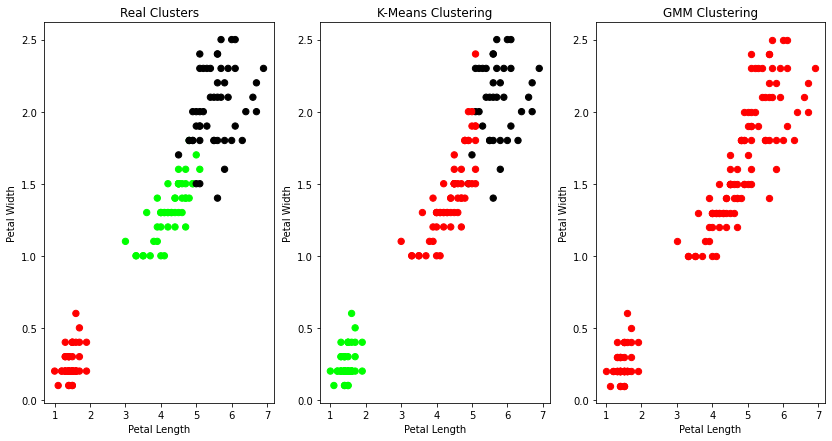

In [21]:
#k-means __ em
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np

# import some data to play with 
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

# # Visualise the clustering results
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications using Petal features
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# General EM for GMM
from sklearn import preprocessing

# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=40) 
gmm.fit(xs)
plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[0], s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')


In [26]:
#knn
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import datasets

iris=datasets.load_iris() 
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
x = iris.data
print(x)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

print('Accuracy Metrics')
print(classification_report(y_test,y_pred))

Iris Data set loaded...
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 

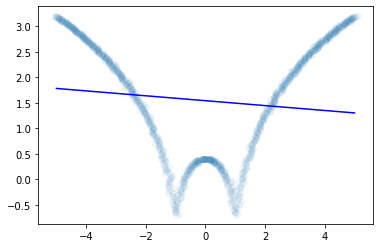

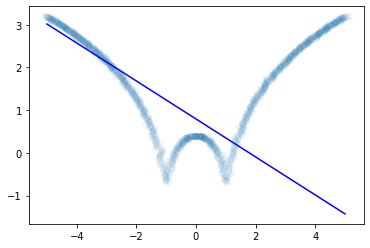

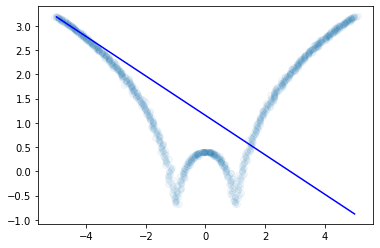

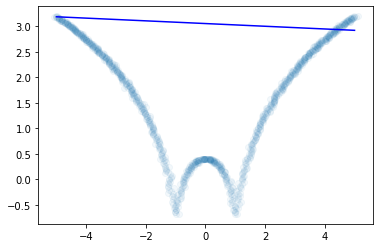

In [25]:
#Local regression

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
y = np.log(np.abs((x ** 2) - 1) + 0.5)
x += np.random.normal(scale = 0.05, size = 1000)

def kernel(x0, x, tau):
    return np.exp(np.sum((x - x0) * 2, axis = 1) / (-2 * tau * 2))

def local_regression(x0, x, y, tau):
    x0 = np.r_[1, x0]
    x = np.c_[np.ones(len(x)), x]
    xw = x.T * kernel(x0, x, tau)
    beta = np.linalg.pinv(xw @ x) @ xw @ y
    return x0 @ beta

def plot_lr(tau):
    domain = np.linspace(-5, 5, 1000)
    prediction = [local_regression(x0, x, y, tau) for x0 in domain]
    plt.scatter(x, y, alpha = 0.05)
    plt.plot(domain, prediction, color = 'blue')
    return plt

plot_lr(10).show()
plot_lr(1).show()
plot_lr(0.1).show()
plot_lr(0.01).show()